In [6]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [40]:
URL="https://www.amazon.in/s?k=denim+shirts&crid=1CD3PNH3F2YSH&sprefix=denim+shirts%2Caps%2C186&ref=nb_sb_noss_1"
HEADERS=({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36','Accept-Language':'en-US, en;q=0.5'})

In [41]:
webpage = requests.get(URL, headers=HEADERS)

In [42]:
type(webpage.content)

bytes

In [43]:
soup=BeautifulSoup(webpage.content, "html.parser")

In [46]:
links=soup.find_all("a", attrs={'class':"a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"})

In [47]:
link=links[0].get('href')

In [48]:
product_list="https://amzon.in" + link

In [49]:
product_list

'https://amzon.in/sspa/click?ie=UTF8&spc=MTo3NzkyOTU2NDU5MjgwNDg2OjE3MjcxNDQ2MDM6c3BfYXRmOjMwMDMzOTA1OTcwNDMzMjo6MDo6&url=%2FLevis-Spread-Collar-Solid-Shirts%2Fdp%2FB0CN9NR8TP%2Fref%3Dsr_1_1_sspa%3Fcrid%3D1CD3PNH3F2YSH%26dib%3DeyJ2IjoiMSJ9.aRFbFYbAAEGKCZyd1vpeeJkFbiJlBRihsLg46ofCTu7Q24rT37ycHjMvpa1V6IW2otYDxk_IbeCWZfBvjBN-Wsp1PqWf6jZcJ8azc6xq3Ws1-MiKIeti74EpYd4FOcB4KUg7OnfIbiAhERxRQ5Rz8SYSUoqJkZVEf0YFY71t8RpOYxsy6qFctxRzzL0PlCqn2z33v5J2CHTaxKlItRiCAWUs8EnjWs-wVHYGm-fSjMrvp5J0uiwpvn6E0rO9CUZXcbuRf50YAjPBI735Ltht4xL90gRDuFCopEfQYqlABaM.Cx9cQiec_zGro9N4yvqWd7UlRPP_GKdGE1BrVKhWuDI%26dib_tag%3Dse%26keywords%3Ddenim%2Bshirts%26qid%3D1727144602%26sprefix%3Ddenim%2Bshirts%252Caps%252C186%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1'

In [50]:
new_webpage = requests.get(product_list, headers=HEADERS)

In [51]:
new_webpage


<Response [200]>

In [52]:
new_soup = BeautifulSoup(new_webpage.content, "html.parser")

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
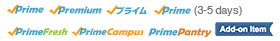
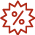

In [35]:
new_soup

In [53]:
new_soup.find("span", attrs={"id":"productTitle"}).text.strip()

"Levi's Men's Spread Collar Slim Fit Solid Shirts"

In [54]:
new_soup.find("span", attrs={"class":"a-price-whole"}).text.strip()

'1,199'

In [55]:
new_soup.find("span",attrs={"class":"a-size-base a-color-base"}).text.strip()

'3.8'

In [56]:
new_soup.find("span",attrs={"id":"acrCustomerReviewText"}).text.strip()

'50 ratings'

In [57]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'class':'a-price-whole'}).string.strip()

    

    except:
        price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("span", attrs={'class':'a-size-base a-color-base'}).string.strip()
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""	

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count



In [60]:
if __name__ == '__main__':

    # add your user agent 
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.in/s?k=denim+shirts&crid=1CD3PNH3F2YSH&sprefix=denim+shirts%2Caps%2C186&ref=nb_sb_noss_1"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[]}
    
    # Loop for extracting product details from each link 
    for link in links_list:
        try:
            new_webpage = requests.get("https://www.amazon.in" + link, headers=HEADERS)
        except requests.exceptions.RequestException as e:
            print(f"Error fetching {link}: {e}")
            continue  # Skip to the next link


        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        

    
    amazon_df = pd.DataFrame.from_dict(d)
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

Error fetching https://aax-eu.amazon.in/x/c/JNaddLkp4EWwS5GCwkc6UrEAAAGSIfCvYAMAAAH2AQBvbm9fdHhuX2JpZDEgICBvbm9fdHhuX2ltcDEgICBy4P85/https://www.amazon.in/Miraan-Sleeve-Casual-Dark-blue-SIGDARKDENIMM/dp/B0B218Q1B2/ref=sxin_23_sbv_search_btf?content-id=amzn1.sym.288d7cd9-bdfb-4778-882a-c15de0f76151%3Aamzn1.sym.288d7cd9-bdfb-4778-882a-c15de0f76151&crid=1CD3PNH3F2YSH&cv_ct_cx=denim+shirts&dib=eyJ2IjoiMSJ9.I3NmPMvS-2IEkEYM61y83g.YiZI_x2BAXNSntiBbW_L4zW6QQkpGVDNTWLATIB8mUk&dib_tag=se&keywords=denim+shirts&pd_rd_i=B0B218Q1B2&pd_rd_r=b93f6872-7abc-4232-831e-dddfb71c358d&pd_rd_w=vG1bR&pd_rd_wg=glRKV&pf_rd_p=288d7cd9-bdfb-4778-882a-c15de0f76151&pf_rd_r=GJPJVD1P7JHSDGKXHGNS&qid=1727146274&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sprefix=denim+shirts%2Caps%2C186&sr=1-1-9131241a-a358-4619-a7b8-0f5a65d91d81: HTTPSConnectionPool(host='www.amazon.inhttps', port=443): Max retries exceeded with url: //aax-eu.amazon.in/x/c/JNaddLkp4EWwS5GCwkc6UrEAAAGSIfCvYAMAAAH2AQBvbm9fdHhuX2JpZDEgICBvbm9fdHhuX2ltcDEgICB

NameError: name 'np' is not defined

In [61]:
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

def get_title(soup):
    try:
        return soup.find("span", attrs={"id": 'productTitle'}).text.strip()
    except AttributeError:
        return ""

def get_price(soup):
    try:
        return soup.find("span", attrs={'class': 'a-price-whole'}).text.strip()
    except AttributeError:
        return ""

def get_rating(soup):
    try:
        return soup.find("span", attrs={'class': 'a-icon-alt'}).text.strip()
    except AttributeError:
        return ""

def get_review_count(soup):
    try:
        return soup.find("span", attrs={'id': 'acrCustomerReviewText'}).text.strip()
    except AttributeError:
        return ""

if __name__ == '__main__':
    HEADERS = ({'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.5'})

    URL = "https://www.amazon.in/s?k=denim+shirts&crid=1CD3PNH3F2YSH&sprefix=denim+shirts%2Caps%2C186&ref=nb_sb_noss_1"

    webpage = requests.get(URL, headers=HEADERS)
    soup = BeautifulSoup(webpage.content, "html.parser")
    
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})
    
    links_list = [link.get('href') for link in links]

    d = {"title": [], "price": [], "rating": [], "reviews": []}

    for link in links_list:
        try:
            time.sleep(2)  # Delay to avoid overloading requests
            new_webpage = requests.get("https://www.amazon.in" + link, headers=HEADERS)
        except requests.exceptions.RequestException as e:
            print(f"Error fetching {link}: {e}")
            continue

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))

    amazon_df = pd.DataFrame.from_dict(d)
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)



Error fetching https://aax-eu.amazon.in/x/c/JJGpdufi4W58sSjhxqkt9UsAAAGSIfWwTQMAAAH2AQBvbm9fdHhuX2JpZDEgICBvbm9fdHhuX2ltcDEgICACTEk8/https://www.amazon.in/Miraan-Sleeve-Casual-Dark-blue-SIGDARKDENIMM/dp/B0B218Q1B2/ref=sxin_23_sbv_search_btf?content-id=amzn1.sym.288d7cd9-bdfb-4778-882a-c15de0f76151%3Aamzn1.sym.288d7cd9-bdfb-4778-882a-c15de0f76151&crid=1CD3PNH3F2YSH&cv_ct_cx=denim+shirts&dib=eyJ2IjoiMSJ9.I3NmPMvS-2IEkEYM61y83g.iYFdzqHZqZHJqA-7I_C2_MHPB690yVOTjwV35jFUfwo&dib_tag=se&keywords=denim+shirts&pd_rd_i=B0B218Q1B2&pd_rd_r=a401afad-faa5-45ff-a487-d5e6a2eb5532&pd_rd_w=pB6E9&pd_rd_wg=97Krq&pf_rd_p=288d7cd9-bdfb-4778-882a-c15de0f76151&pf_rd_r=KH2PPJD35EKZJK842YVG&qid=1727146602&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sprefix=denim+shirts%2Caps%2C186&sr=1-1-9131241a-a358-4619-a7b8-0f5a65d91d81: HTTPSConnectionPool(host='www.amazon.inhttps', port=443): Max retries exceeded with url: //aax-eu.amazon.in/x/c/JJGpdufi4W58sSjhxqkt9UsAAAGSIfWwTQMAAAH2AQBvbm9fdHhuX2JpZDEgICBvbm9fdHhuX2ltcDEgICA

In [62]:
amazon_df

,title,price,rating,reviews
0,Levi's Men's Spread Collar Slim Fit Solid Shirts,"1,199",3.8 out of 5 stars,50 ratings
1,Levi's Men Shirt,"1,136.",3.9 out of 5 stars,43 ratings
2,Levi's Men's Geometric Printed Slim Fit Shirt,"1,739",2.0 out of 5 stars,1 rating
3,Dennis Lingo Men's Solid Slim Fit Casual Shirt,699,3.8 out of 5 stars,"2,427 ratings"
4,Lymio Casual Shirt for Men|| Shirt for Men|| M...,479,3.9 out of 5 stars,"1,808 ratings"
...,...,...,...,...
65,FYLTR Men's Regular Fit Oxford Cotton Blend Sh...,569,5.0 out of 5 stars,49 ratings
66,Majestic Man Slim Fit Satin Cotton Formal Shir...,637,4.0 out of 5 stars,404 ratings
67,FYLTR Men's Regular Fit Solid Shirt - Full Sle...,559,4.8 out of 5 stars,72 ratings
68,Amazon Brand - Symbol Men's Cotton Shirt | Chi...,549,4.1 out of 5 stars,178 ratings
